In [1]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel

In [2]:
data = load_breast_cancer()
data.data.shape

(569, 30)

In [3]:
LR_ = LR(solver='liblinear', C=0.8, random_state=420)
cross_val_score(LR_, data.data, data.target, cv=10).mean()

0.9508145363408522

In [4]:
X_embedded = SelectFromModel(LR_, norm_order=1).fit_transform(data.data, data.target)
# norm_order=1表示进行L1范式选择

In [5]:
X_embedded.shape

(569, 9)

In [6]:
cross_val_score(LR_, X_embedded, data.target, cv=10).mean()

0.9368107769423559

(0.0, 30)
(0.1019835845615114, 17)
(0.2039671691230228, 12)
(0.30595075368453417, 10)
(0.4079343382460456, 8)
(0.509917922807557, 8)
(0.6119015073690683, 5)
(0.7138850919305798, 5)
(0.8158686764920912, 5)
(0.9178522610536025, 5)
(1.019835845615114, 5)
(1.1218194301766253, 4)
(1.2238030147381367, 3)
(1.325786599299648, 2)
(1.4277701838611596, 2)
(1.529753768422671, 1)
(1.6317373529841823, 1)
(1.7337209375456937, 1)
(1.835704522107205, 1)
(1.9376881066687164, 1)


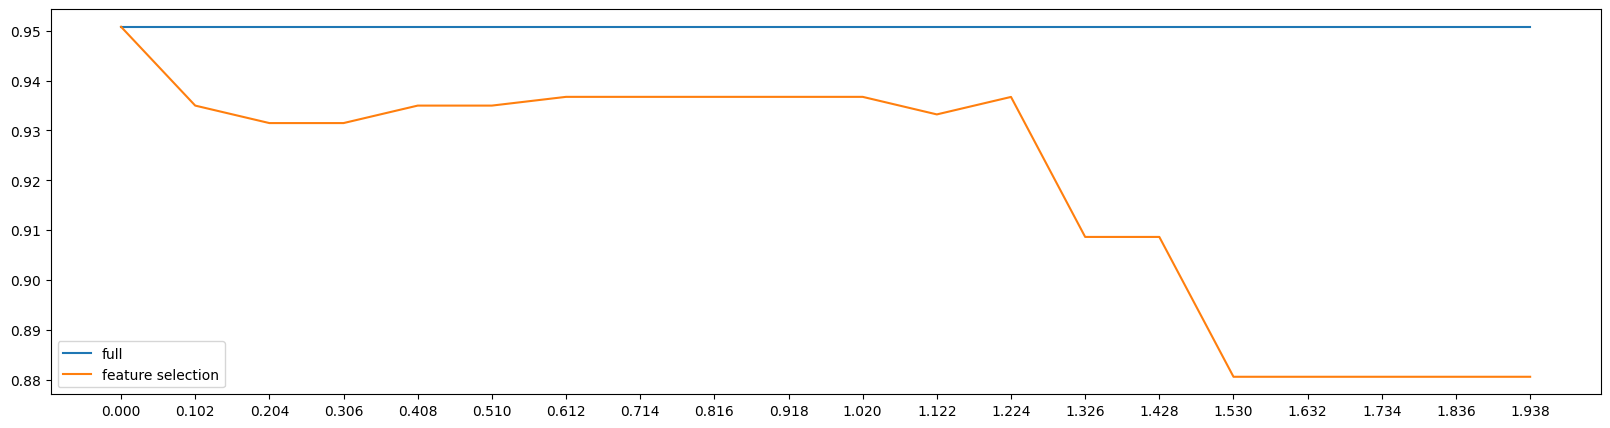

In [7]:
fullx = []
fsx = []
threshold = np.linspace(0, abs((LR_.fit(data.data, data.target).coef_)).max(), 20)
k = 0
for i in threshold:
    X_embedded = SelectFromModel(LR_, threshold=i).fit_transform(data.data, data.target)
    fullx.append(cross_val_score(LR_, data.data, data.target, cv=5).mean())
    fsx.append(cross_val_score(LR_, X_embedded, data.target, cv=5).mean())
    print((threshold[k], X_embedded.shape[1]))
    k += 1

plt.figure(figsize=(20, 5))
plt.plot(threshold, fullx, label="full")
plt.plot(threshold, fsx, label="feature selection")
plt.xticks(threshold)
plt.legend()
plt.show()

0.9561090225563911 6.01


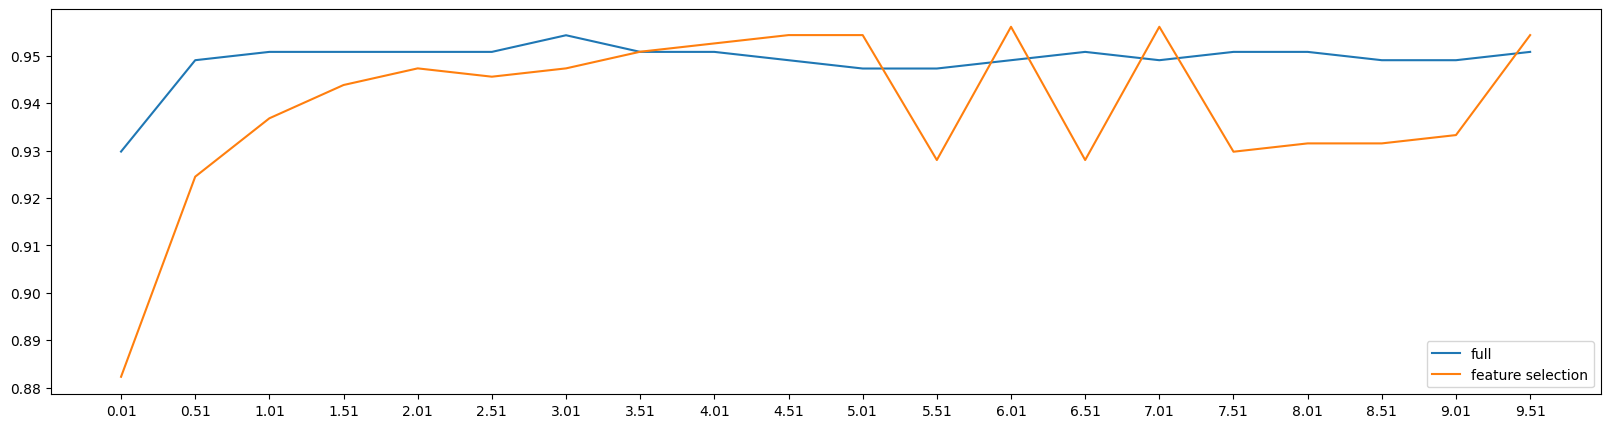

In [8]:
fullx = []
fsx = []
C = np.arange(0.01, 10.01, 0.5)
for i in C:
    LR_ = LR(solver="liblinear", C=i, random_state=420)
    fullx.append(cross_val_score(LR_, data.data, data.target, cv=10).mean())

    X_embedded = SelectFromModel(LR_, norm_order=1).fit_transform(data.data, data.target)
    fsx.append(cross_val_score(LR_, X_embedded, data.target, cv=10).mean())

print(max(fsx), C[fsx.index(max(fsx))])
plt.figure(figsize=(20, 5))
plt.plot(C, fullx, label="full")
plt.plot(C, fsx, label="feature selection")
plt.xticks(C)
plt.legend()
plt.show()

0.9561090225563911 6.079999999999999


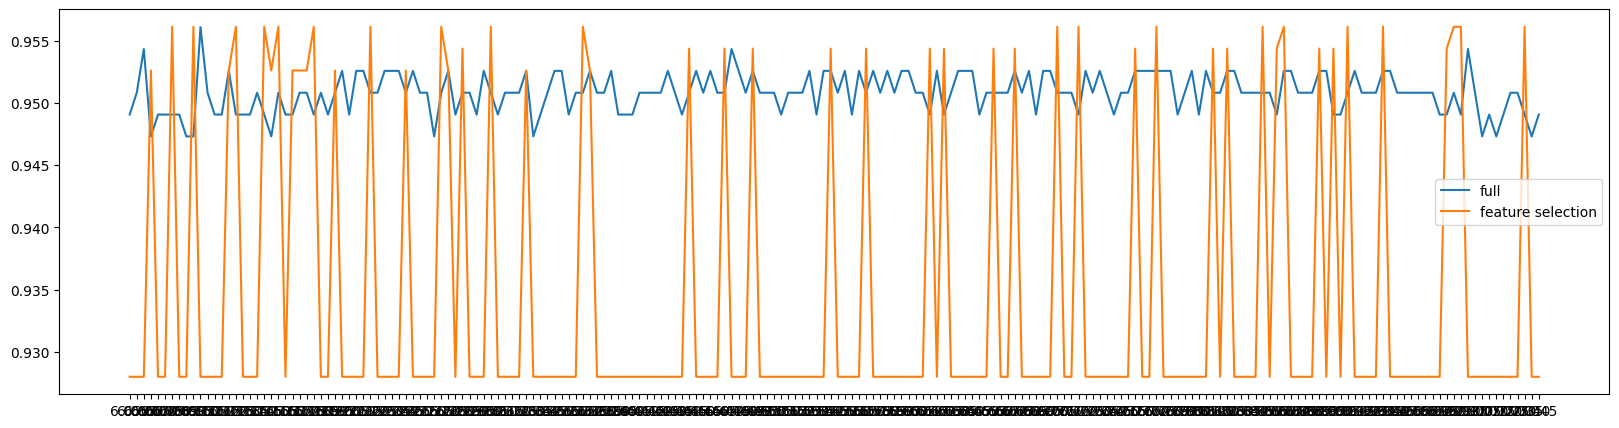

In [9]:
fullx = []
fsx = []
C = np.arange(6.05, 7.05, 0.005)
for i in C:
    LR_ = LR(solver="liblinear", C=i, random_state=420)

    fullx.append(cross_val_score(LR_, data.data, data.target, cv=10).mean())

    X_embedded = SelectFromModel(LR_, norm_order=1).fit_transform(data.data, data.target)
    fsx.append(cross_val_score(LR_, X_embedded, data.target, cv=10).mean())

print(max(fsx), C[fsx.index(max(fsx))])
plt.figure(figsize=(20, 5))
plt.plot(C, fullx, label="full")
plt.plot(C, fsx, label="feature selection")
plt.xticks(C)
plt.legend()
plt.show()

In [10]:
#验证模型效果：降维之前
LR_ = LR(solver="liblinear", C=6.079999999999999, random_state=420)
cross_val_score(LR_, data.data, data.target, cv=10).mean()

0.9490601503759398

In [11]:
#验证模型效果：降维之后
LR_ = LR(solver="liblinear", C=6.079999999999999, random_state=420)
X_embedded = SelectFromModel(LR_, norm_order=1).fit_transform(data.data, data.target)
cross_val_score(LR_, X_embedded, data.target, cv=10).mean()

0.9561090225563911

In [12]:
X_embedded.shape

(569, 9)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [14]:
l2 = []
l2test = []
Xtrain, Xtest, Ytrain, Ytest = train_test_split(data.data, data.target, test_size=0.3, random_state=420)

D:\IDE\Anaconda\A\envs\dproject\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\IDE\Anaconda\A\envs\dproject\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\IDE\Anaconda\A\envs\dproject\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


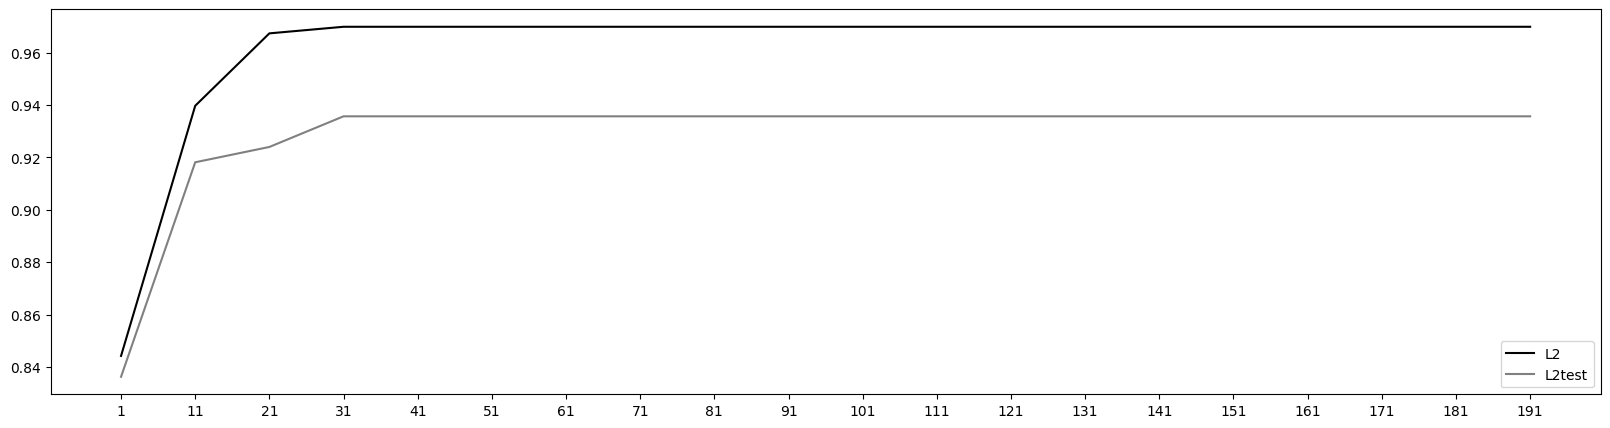

In [15]:
for i in np.arange(1, 201, 10):
    lrl2 = LR(penalty="l2", solver="liblinear", C=0.8, max_iter=i)
    lrl2 = lrl2.fit(Xtrain, Ytrain)
    l2.append(accuracy_score(lrl2.predict(Xtrain), Ytrain))
    l2test.append(accuracy_score(lrl2.predict(Xtest), Ytest))

graph = [l2, l2test]
color = ["black", "gray"]
label = ["L2", "L2test"]

plt.figure(figsize=(20, 5))
for i in range(len(graph)):
    plt.plot(np.arange(1, 201, 10), graph[i], color[i], label=label[i])
plt.legend(loc=4)
plt.xticks(np.arange(1, 201, 10))
plt.show()

In [16]:
#我们可以使用属性.n_iter_来调用本次求解中真正实现的迭代次数
lr = LR(penalty="l2", solver="liblinear", C=0.8, max_iter=300).fit(Xtrain, Ytrain)
lr.n_iter_

array([25], dtype=int32)

In [17]:
from sklearn.datasets import load_iris

iris = load_iris()

In [18]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [22]:
for multi_class in ('multinomial', 'ovr'):
    lr = LR(solver='sag', max_iter=100, random_state=42,
            multi_class=multi_class).fit(iris.data, iris.target)
    print("training score : %.3f (%s)" % (lr.score(iris.data, iris.target), multi_class))

training score : 0.987 (multinomial)
training score : 0.960 (ovr)


D:\IDE\Anaconda\A\envs\dproject\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\IDE\Anaconda\A\envs\dproject\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\IDE\Anaconda\A\envs\dproject\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\IDE\Anaconda\A\envs\dproject\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [23]:
#打印两种multi_class模式下的训练分数
#%的用法，用%来代替打印的字符串中，想由变量替换的部分。%.3f表示，保留三位小数的浮点数。%s表示，字符串。
#字符串后的%后使用元祖来容纳变量，字符串中有几个%，元祖中就需要有几个变量